In [1]:
!ls

data					roc_network_bgl_5_long_seqs.png
evaluate_distilled_model_results.ipynb	roc_network_bgl_bidirectional.png
evaluate_predictions.ipynb		roc_network_bgl_only_last_element.png
extract_sequences.ipynb			roc_network_bidirectional.png
model.3.after_refs.json.result		roc_network_only_last_element.png
model.keras				test_data.pk
nn_connector_model.py			train_data.pk
predict_and_save.ipynb			train_model.ipynb
preprocess_data.ipynb			write_test_set_to_abbadingo.ipynb
__pycache__				write_train_set_to_abbadingo.ipynb
ROC_distilled_model_ctu.png		X_pred.pk


In [2]:
!ls data

BGL_preprocessed.less_templates.csv  sequences_less_templates.dat
BGL_preprocessed.standard.csv	     X_test.dat
labels_less_templates.txt	     X_train.dat
labels.txt			     X_train_less_sequences.dat
README.md			     y_test.txt
sequences.dat


In [3]:
import pandas as pd
import pickle as pk

label_file = "data/y_test.txt"
results_file = "model.3.after_refs.json.result"

df = pd.read_csv(results_file, delimiter=";")
df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""0 10 114 121 121 162 114 121 162 114 121 121""","[44,196,-1]","[-4.6843,-0.479716,-0.340693]",-5.50471,-1.834900,-4.684300
1,1,"""1 10 12 255 145 137 12 59 12 255 145 12""","[5,124,-1]","[-5.3299,-1.51719,-0.438285]",-7.28538,-2.428460,-5.329900
2,1,"""1 10 129 129 129 198 198 198 198 198 37 37""","[50,221,-1]","[-4.97497,-0.404321,-0.27675]",-5.65605,-1.885350,-4.974970
3,1,"""0 10 269 50 50 260 260 269 269 269 269 269""","[90,340,-1]","[-2.23648,-2.78907,-1.99375]",-7.01930,-2.339770,-2.789070
4,1,"""0 10 121 121 121 162 114 121 121 121 121 121""","[47,208,-1]","[-2.74233,-0.575317,-0.234893]",-3.55254,-1.184180,-2.742330
...,...,...,...,...,...,...,...
588224,1,"""1 10 245 245 245 245 245 245 245 245 245 245""","[31,43,334,-1]","[-17.8821,-14.6737,-18.3126,-16.7375]",-67.60580,-16.901500,-18.312600
588225,1,"""0 10 92 171 41 92 171 41 237 48 92 171""","[30,182,-1]","[-5.38944,-1.05611,-0.341313]",-6.78686,-2.262290,-5.389440
588226,1,"""1 10 269 269 269 269 269 269 269 50 229 284""","[90,344,-1]","[-2.23648,-0.237802,-0.146798]",-2.62108,-0.873693,-2.236480
588227,1,"""0 10 223 223 223 223 223 223 223 223 223 223""","[78,308,-1]","[-0.777807,-0.176725,-0.180918]",-1.13545,-0.378483,-0.777807


In [4]:
y = list()
with open(label_file, "rt") as inf:
    for line in inf:
        line = line.strip("\n")
        y.append(int(line))
len(df), len(y)

(588229, 588229)

In [5]:
df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

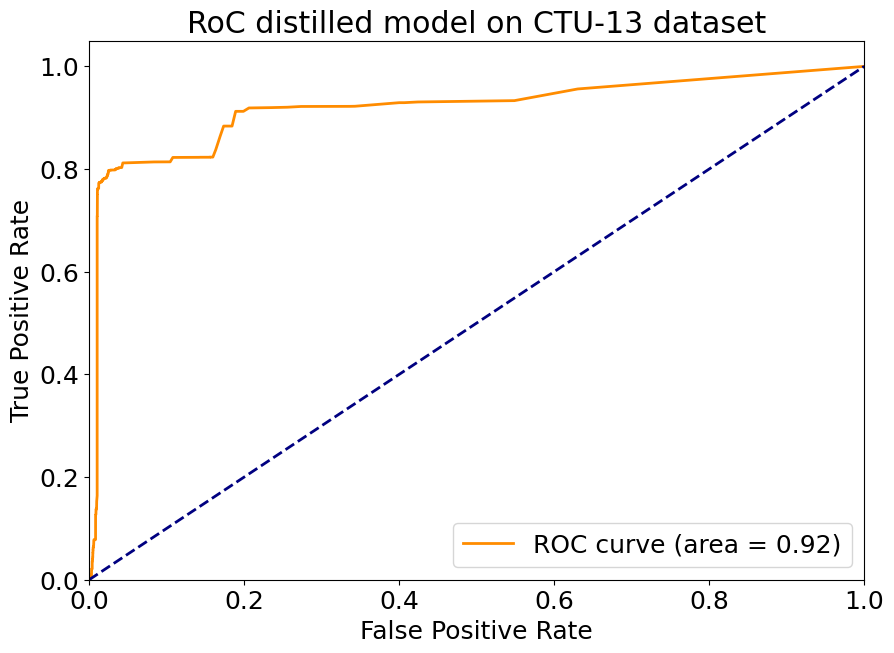

In [6]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

score = -df[" min score"]

fpr, tpr, thresholds = roc_curve(y, score)
roc_auc = roc_auc_score(y, score)

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC distilled model on CTU-13 dataset")
plt.legend(loc="lower right")
plt.savefig("ROC_distilled_model_ctu.png")